In [73]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import random
import seaborn

In [74]:
#Load the input data
data = scipy.io.loadmat("C://Users/Home/Downloads/AllSamples.mat") 

In [75]:
#Load the input into a DataFrame with Columns X and Y
dataFrame = pd.DataFrame(data['AllSamples'])
df = pd.DataFrame({'X':dataFrame[0],'Y':dataFrame[1]})
df.head()

,X,Y
0,2.059249,7.205988
1,8.875781,8.960924
2,8.007064,2.775320
3,5.017288,3.763120
4,6.390562,5.179565


<AxesSubplot:xlabel='X', ylabel='Y'>

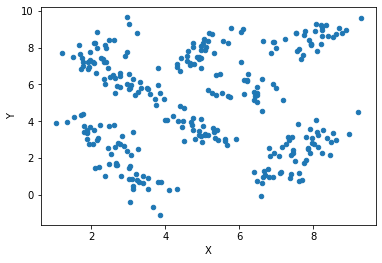

In [76]:
#visualizing the dataset in scatter plot before clustering
df.plot.scatter(x='X',y='Y')

In [77]:
#method to calculate sum of squared error
def calcSSE(muLst,df,K):
    
    k = df[K].max()
    sseSum=0
    X2=np.array(muLst)
    
    for j in range(1,k+1):
        a = df[K]==j
        b = df[a]
        X1 = np.array(b.iloc[:,0:2])
        for i in range(0,len(X1)):
            sseSum+= np.sum((X2[j-1] - X1[i])**2)
    return sseSum

In [78]:
#method to assignClusters after calculating Eucledian distance between a selected centroid and the datapoints
def assignCluster(lstEucledianDist):
    index = lstEucledianDist.index(min(lstEucledianDist))
    return index+1

In [79]:
#Objective Function to measure the eucledian distance
def eucledianFunction(X2,X1):
    
    clusterList = [] #list to hold the assigned cluster value after grouping
    val = 0
    for i in range(0,len(X1)):
        dist_list=[] #the list to hold the eucledian distance value of a given datapoint from each of the centroids
        for j in range(0,len(X2)):
            dist_list.append(np.sqrt(np.sum((X2[j] - X1[i])**2)))
        clusterList.append(assignCluster(dist_list))
    return clusterList


 Iteration : 1

 Clustering for K = 2

 Clustering for K = 3

 Clustering for K = 4

 Clustering for K = 5

 Clustering for K = 6

 Clustering for K = 7

 Clustering for K = 8

 Clustering for K = 9

 Clustering for K = 10

 The DataFrame after cluster assignment

            X         Y  K=2  K=3  K=4  K=5  K=6  K=7  K=8  K=9  K=10
0    2.059249  7.205988    1    2    2    2    1    7    6    5     3
1    8.875781  8.960924    1    2    1    5    5    3    8    4    10
2    8.007064  2.775320    2    1    3    1    3    2    3    3     5
3    5.017288  3.763120    2    3    4    3    2    4    2    1     7
4    6.390562  5.179565    1    2    1    5    2    4    1    2     2
..        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   ...
295  4.783632  7.106443    1    2    2    2    1    1    1    2     8
296  2.646830  6.323443    1    2    2    2    1    7    6    7     3
297  4.322397  0.330889    2    3    4    4    6    6    4    8     1
298  2.364303  1.052097    2    3 

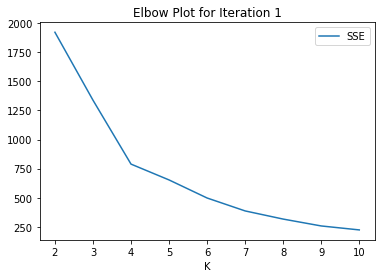

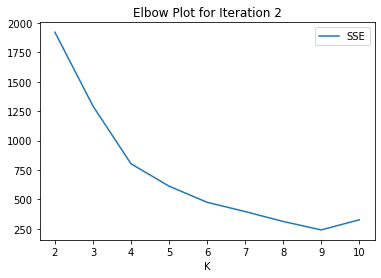

In [80]:
#getCentroidValues for two different random initialization

for iter in range(0,2): #two iterations
    
    print("\n Iteration : "+str(iter+1))
    df = pd.DataFrame({'X':dataFrame[0],'Y':dataFrame[1]})
    X = np.array(df) #Convert df to array for calculation purpose
    muList=[] #Declare a list to hold the Sum of Squared error values
    
    #iterate from K=2 to 10
    for k in range(2,11): 
        
        print("\n Clustering for K = "+ str(k))
        
        randomCentroidList = []
        centroidList = []
        centroidArr = []
        Kval = "K="+ str(k)
    
        #Pick random indices from the dataframe df based on the value of K and store them in a list
        centroid_index = random.sample(range(0, len(df)), k)
        
        #Assign the data points corresponding to the random indices as Centroids
        for i in centroid_index:
            randomCentroidList.append(df.iloc[i,0:2])
        centroid = np.array(randomCentroidList) #Convert initial centroid list to array for calculation purpose
    
        #re-iterate the objective function calculation till the centroids converge
        #Condition checks if the previous centroid Array(denoted by centroidArr) is equal to current centroid Array(denoted by centroid)
        while(np.array_equal(centroid,centroidArr)==False):
            
            df[Kval] = eucledianFunction(centroid,X)
            centroidList = []
            for j in range(1,k+1):
                a = df[Kval]==j
                b = df[a]                
                centroidList.append([np.mean(b['X']),np.mean(b['Y'])]) #calculate the mean of current centroid and store it in the object centroidList
            centroidArr = np.array(centroidList) #Convert new set of centroid lists to array for calculation purpose
            
            #Swap previous centroid value with current centroid values
            temp = centroid
            centroid = centroidArr
            centroidArr = temp
        muList.append(centroidArr) #The list contains the final centroid values for each value of K i.e. K=2,3,...10
    
    
    print("\n The DataFrame after cluster assignment")
    print("\n" +str(df))
    
    #DataFrame to hold the value of K and the corresponding SSE value
    dfPlot = pd.DataFrame({'K':range(2,11),'SSE':0}) 
    
    
    
    #Calculate the SumOfSquaredError from the final list of clusters
    for i in range(0,len(muList)):
        K='K='+str(i+2)
        dfPlot['SSE'][i] = calcSSE(muList[i],df,K)
    
    print("\n The Cluster value and its corresponding Sum of Squared Error values")
    print("\n"+str(dfPlot))
    
    #Plot the elbow plot
    print("\n The elbow plot for iteration "+str(iter+1)+" is shown at the bottom")
    dfPlot.plot.line(x='K',y='SSE',title=("Elbow Plot for Iteration "+ str(iter+1)))
    